<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/RecurrentANN/LSTM_aviation_Recorrent_Neural_Network_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from sklearn import preprocessing

In [3]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [4]:
df=pd.read_csv("airline-passengers.csv")

In [5]:
series = np.array(df['Passengers'])

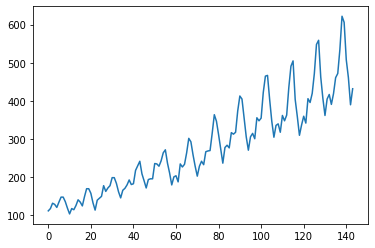

In [6]:
plt.plot(series)

In [ ]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(series)
series =  scaler_X.transform(series)

In [7]:
P = 10 # period
D = 1
X = []
Y = []
num,col = df.shape

for t in range(num-P):
  t_next = t+ P
  xx = series[t:t_next]
  X.append(xx)
  yy = series[t_next]
  Y.append(yy)

X = np.array(X).reshape(-1,P,1) # data NxDxP
Y = np.array(Y)
print('input shape',X.shape,'output shape',Y.shape )

input shape (134, 10, 1) output shape (134,)


In [8]:
X[0]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]])

In [9]:
N, cols, other = X.shape
X_train = X[:-N//2]
Y_train = Y[:-N//2]
X_test = X[-N//2:]
Y_test = Y[-N//2:]

In [10]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Input(shape=(P,1)))

# Add a simpleRNN layer with 5 internal units.
model.add(LSTM(5,'relu'))
# Add a Dense layer with 1 units.
model.add(Dense(1))
# 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse',optimizer=Adam(lr=0.1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
r = model.fit(X_train,Y_train,
              epochs=100, 
              validation_data = ( X_test ,Y_test ) )

Epoch 1/100
3/3 [==============================] - 25s 451ms/step - loss: 5183.0878 - val_loss: 36955.3633
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 7680.1055 - val_loss: 28182.0605
Epoch 3/100
3/3 [==============================] - 0s 42ms/step - loss: 6499.9716 - val_loss: 6116.4121
Epoch 4/100
3/3 [==============================] - 0s 41ms/step - loss: 1271.4072 - val_loss: 21813.6523
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 3753.5092 - val_loss: 8352.2217
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 970.7196 - val_loss: 7972.8535
Epoch 7/100
3/3 [==============================] - 0s 44ms/step - loss: 1972.8026 - val_loss: 9040.9385
Epoch 8/100
3/3 [==============================] - 0s 45ms/step - loss: 2063.9373 - val_loss: 6090.4639
Epoch 9/100
3/3 [==============================] - 0s 53ms/step - loss: 1075.7077 - val_loss: 7377.7725
Epoch 10/100
3/3 [==============================] - 0s 45ms/

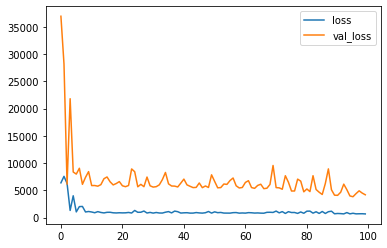

In [13]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

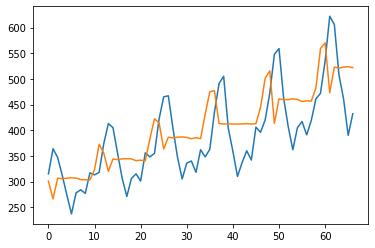

In [14]:
# this is a wrong way to do....
pred_Y = model.predict(X_test)
plt.plot(Y_test, label='prediction target')
plt.plot(pred_Y, label='prediction forecast')

In [15]:
pred_test = []
for xi in X_test:
  yi = model.predict(xi.reshape(1,-1,1))[0,0]
  pred_test.append(yi)

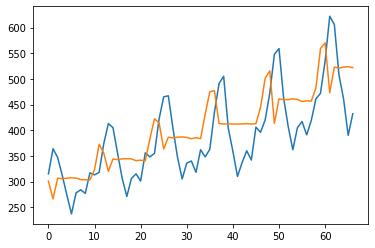

In [16]:
plt.plot(Y_test, label='prediction target')
plt.plot(pred_test, label='prediction forecast')

In [17]:
a,b = model.layers[1].get_weights()
print(a.shape,b.shape)

(5, 1) (1,)


In [18]:
print(a)
print('===============')
print(b)

[[ 1.1393764 ]
 [-0.756248  ]
 [ 0.09985399]
 [-0.23739646]
 [ 0.16416216]]
[2.5598724]
